In [1]:
import pandas  as pd

df = pd.read_csv("Rdata.csv")

df.head()

,카페이름,review
0,FFEE,아메라카노 원두 세가지 중에 고를 수 있어서 취향에 맞게 먹을 수 있어 좋아요. 물...
1,MouseRabbit카페,노트북 작업하기 좋은 곳이에용. 지하는 좌식이고 분위기가 다르네요. 좀 더 따뜻한 ...
2,"TAKEN COFFEE 건대후문점카페,디저트",저의 최애커피집이에요 너무 맛있고 좋아요 점심에 항상 바쁜데도 늘 친절해요\r\n음...
3,TWG Tea 성수낙낙점,모든 소품들이 twg 로고가 박혀있어 정말 고급스러워서 대접 받는 느낌에 더 맛나게...
4,"걈카페,디저트",조아요 커피 맛있어요! 케이크도! 진짜 아지트같은 카페에여ㅠㅠ최애 좌석이 편하고 콘...


In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

# 데이터 로드
df = pd.read_csv("Rdata.csv")

# 임베딩 모델 로드
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

# 방법 1: 단어 제거 후 임베딩
stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ']

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    # 5단어마다 줄바꿈 추가
    result = []
    for i, word in enumerate(filtered_words):
        result.append(word)
        if (i + 1) % 5 == 0:  # 5단어마다
            result.append('\n')
    return ' '.join(result)

# 전처리된 리뷰 생성
df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

# 임베딩 생성
print("임베딩 생성 중...")
embeddings = []
for text in tqdm(df['filtered_review'], desc="임베딩 처리"):
    embedding = model.encode(text, show_progress_bar=False)
    embeddings.append(embedding.tolist())

# 임베딩 열 추가
df['임베딩'] = embeddings

# 결과 저장
output_file = "Rdata_bert.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"총 데이터 수: {len(df)}")

임베딩 생성 중...


임베딩 처리: 100%|██████████| 215/215 [00:11<00:00, 18.77it/s]


총 데이터 수: 215


In [5]:
df = pd.read_csv("Rdata_bert.csv")

df.head()

,카페이름,review,filtered_review,임베딩
0,FFEE,아메라카노 원두 세가지 중에 고를 수 있어서 취향에 맞게 먹을 수 있어 좋아요. 물...,아메라카노 원두 세가지 중에 고를 \n 수 있어서 취향에 맞게 먹을 \n 수 있어 ...,"[-1.1326961517333984, -0.7926070690155029, -0...."
1,MouseRabbit카페,노트북 작업하기 좋은 곳이에용. 지하는 좌식이고 분위기가 다르네요. 좀 더 따뜻한 ...,노트북 작업하기 좋은 곳이에용. 지하는 \n 좌식이고 분위기가 다르네요. 좀 더 \...,"[-0.444373220205307, -1.061728835105896, -0.45..."
2,"TAKEN COFFEE 건대후문점카페,디저트",저의 최애커피집이에요 너무 맛있고 좋아요 점심에 항상 바쁜데도 늘 친절해요\r\n음...,저의 최애커피집이에요 점심에 항상 바쁜데도 \n 늘 친절해요 음료 메뉴가 엄청 \n...,"[-0.7013822793960571, -0.9376376867294312, -0...."
3,TWG Tea 성수낙낙점,모든 소품들이 twg 로고가 박혀있어 정말 고급스러워서 대접 받는 느낌에 더 맛나게...,모든 소품들이 twg 로고가 박혀있어 \n 고급스러워서 대접 받는 느낌에 더 \n ...,"[-1.0076357126235962, -0.8326747417449951, -0...."
4,"걈카페,디저트",조아요 커피 맛있어요! 케이크도! 진짜 아지트같은 카페에여ㅠㅠ최애 좌석이 편하고 콘...,조아요 커피 맛있어요! 케이크도! 아지트같은 \n 카페에여ㅠㅠ최애 좌석이 편하고 콘...,"[-0.6524172425270081, -0.9057363271713257, -0...."


데이터 수: 215
임베딩 차원: 768
1. K-Means Clustering 수행 중...
2. Spectral Clustering 수행 중...
3. Hierarchical Clustering 수행 중...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


4. DBSCAN 수행 중...
결과가 'Rdata_clustered_all.csv'에 저장되었습니다.

=== 클러스터링 결과 요약 ===

KMeans 클러스터 분포:
KMeans
0    25
1    66
2    36
3    39
4    49
Name: count, dtype: int64

Spectral 클러스터 분포:
Spectral
0    23
1    64
2    59
3    37
4    32
Name: count, dtype: int64

Hierarchical 클러스터 분포:
Hierarchical
0    50
1    69
2    59
3    16
4    21
Name: count, dtype: int64

DBSCAN 클러스터 분포:
DBSCAN
0    215
Name: count, dtype: int64


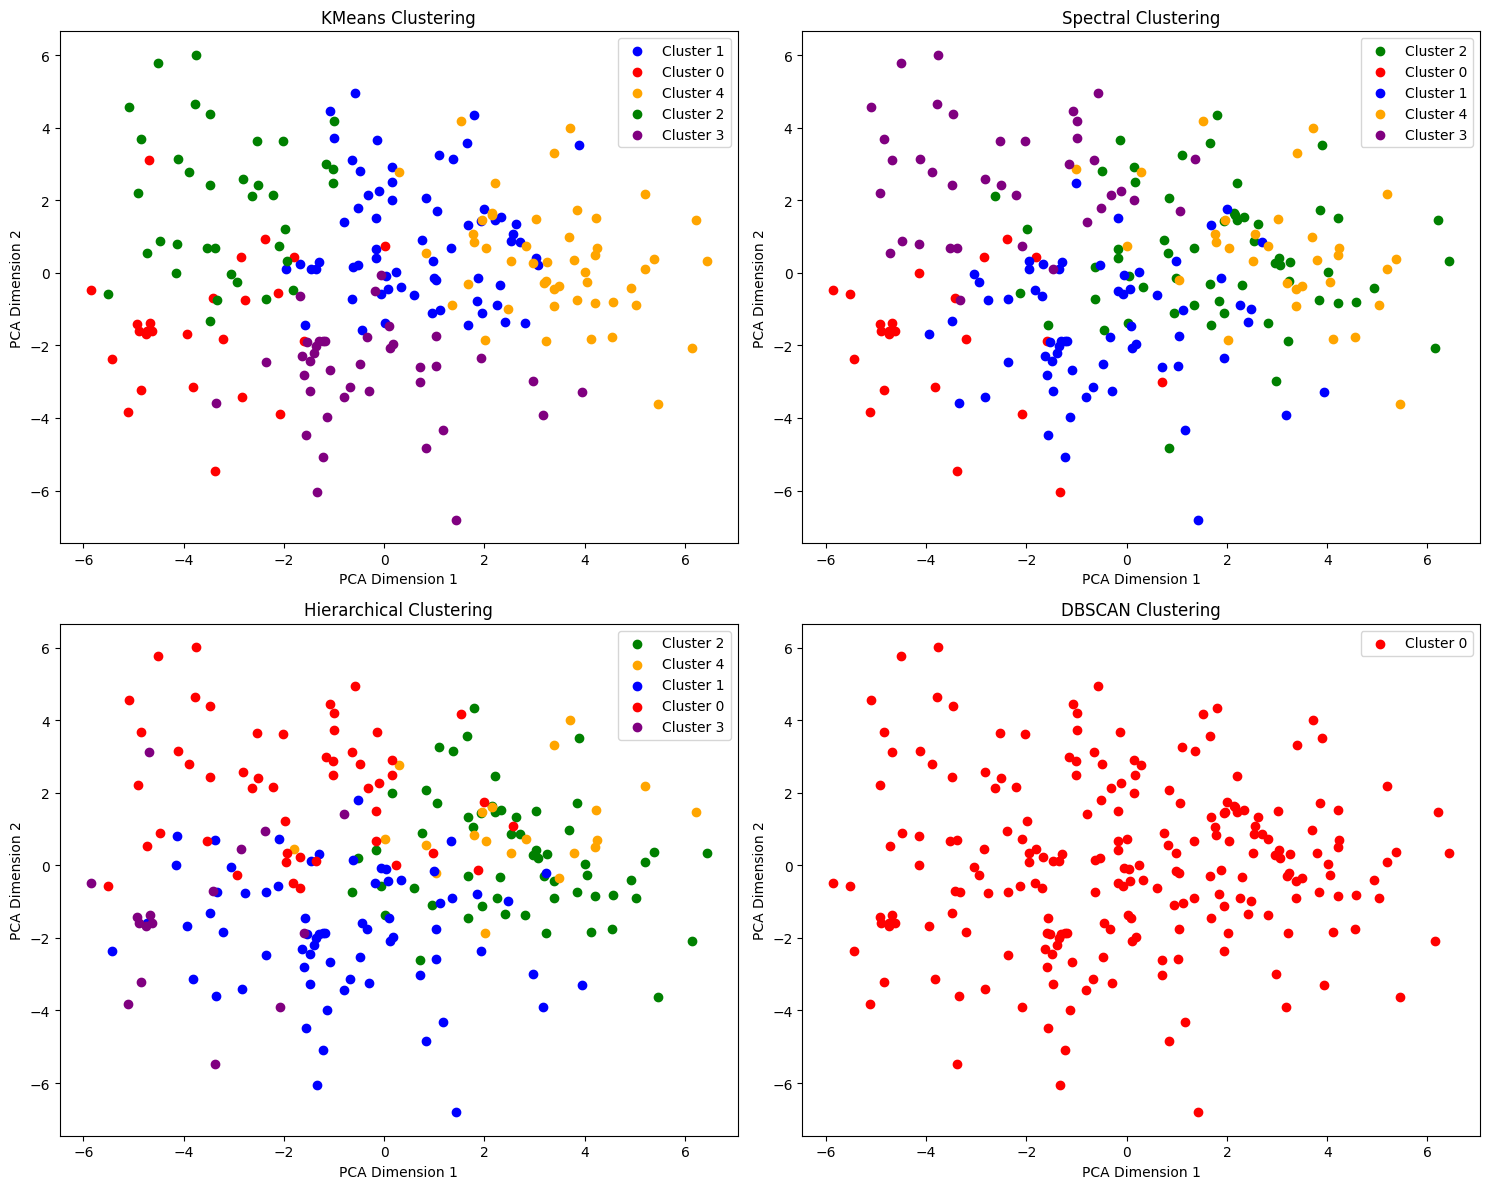


=== Spectral Clustering 결과 샘플 ===

--- Cluster 0 ---
1. 노트북 작업하기 좋은 곳이에용. 지하는 
 좌식이고 분위기가 다르네요. 좀 더 
 따뜻한 느낌 ! 안쪽에 단체로 
 앉을 수 있는 굉장히 프라이빗한 
 자리가 있어서 담에 모임있을 때 
 일루 와야겠다구 다짐。。。 250406 오늘 
 오랜만에 마우스래빗 방문했어요~ 콘서트 끝나고 
 왔어요~이번달 예성오빠 콘서트 보고 또올게요~~ 
 새로운 케이크도 맛있어요!! 250420 예성오빠 
 콘서트 끝나고 마우스래빗 왔어요~ 맛있어서 
 다먹고 찍었네요~~ 딸기요거트 추가해서 먹어요!! 
 고양이키링도 귀여워서 사가요~ 자주 가고 
 있는 카페인데 지하가 아늑하고 음료도 
 맛있어서 바로 호로록 먹었어요 양이 
 많진않음~ 오랜만에 슈주예성오빠카페 들렸어요~ 항상친절하고 
 깨끗해서 좋아요~~ 오늘도 오랜만에 슈주예성오빠카페 
 들렸다가요~ 음료 맛있어요~ 마우스래빗 좋아요~~ 
 홍차라떼였나 음료와 디저트 다 좋았어요. 
 개인적으로 초코케이크는 평소 선호하지않지만 마우스래빗은 
 맛있었어요. 잠깐 공부하러 간거였는데 시끌시끌하긴 
 하지만 테이블 간격도 적당하고 만석은 
 아니었어서 웅성거리는 정도 편안한 의자는 
 아니에요. 지하층은 좌식인데 칸칸이 막혀있고 
 층고가 낮아서 답답해보였어요. 2층 이용을 
 추천해요! 240821 오늘은 엄마께서 서울올라오셔서 
 집에 오셨어요~그래서 내일 가시기전에 오늘 
 엄마와 같이 마우스래빗 방문했어요~ 스무디도 
 맛있어요~~ 엄마께서 에어컨바람을 추워하셔서 저혼자 
 더 공부하려다 리뷰쓰고 집가서 공부하려고요~~ 
 지난주에는 수목금토 4일 동안 공부하다 
 갔는데 오늘은 엄마랑 와서 빨리 
 가요~~ 엄마와 같이 마우스래빗에서 찍은사진 
 올려요~ 나중에 편하게 사리원 식사하시러 
 오세요~ 사촌언니네로 가셔도 괜찮아요~~ 혼자서는 
 말 못하다 엄마께 팬이라고 같이 
 말씀드려달라고 해서 말씀드리고 갔어요~~ 

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("Rdata_bert.csv")

# 임베딩 벡터를 numpy 배열로 변환
embeddings = np.array([eval(emb) for emb in df['임베딩']])

print(f"데이터 수: {len(df)}")
print(f"임베딩 차원: {embeddings.shape[1]}")

# 1. K-Means Clustering
print("1. K-Means Clustering 수행 중...")
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans'] = kmeans.fit_predict(embeddings)

# 2. Spectral Clustering
print("2. Spectral Clustering 수행 중...")
similarity_matrix = cosine_similarity(embeddings)
spectral = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
df['Spectral'] = spectral.fit_predict(similarity_matrix)

# 3. Hierarchical Clustering (Agglomerative)
print("3. Hierarchical Clustering 수행 중...")
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

# 4. DBSCAN
print("4. DBSCAN 수행 중...")
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['DBSCAN'] = dbscan.fit_predict(embeddings)

# 결과 저장
output_file = "Rdata_clustered_all.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"결과가 '{output_file}'에 저장되었습니다.")

# 클러스터링 결과 요약
print("\n=== 클러스터링 결과 요약 ===")
clustering_methods = ['KMeans', 'Spectral', 'Hierarchical', 'DBSCAN']

for method in clustering_methods:
    print(f"\n{method} 클러스터 분포:")
    print(df[method].value_counts().sort_index())

# PCA로 차원 축소 (시각화용)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, method in enumerate(clustering_methods):
    ax = axes[i]
    unique_clusters = df[method].unique()
    
    for cluster in unique_clusters:
        if cluster == -1:  # DBSCAN 노이즈
            cluster_points = reduced_embeddings[df[method] == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c='black', marker='x', s=50, label='Noise')
        else:
            cluster_points = reduced_embeddings[df[method] == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[cluster % len(colors)], label=f'Cluster {cluster}')
    
    ax.set_title(f'{method} Clustering')
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.legend()

plt.tight_layout()
plt.show()

# 클러스터별 샘플 리뷰 출력 (Spectral Clustering 기준)
print("\n=== Spectral Clustering 결과 샘플 ===")
for cluster in sorted(df['Spectral'].unique()):
    print(f"\n--- Cluster {cluster} ---")
    cluster_reviews = df[df['Spectral'] == cluster]['filtered_review'].head(3)
    for i, review in enumerate(cluster_reviews):
        print(f"{i+1}. {review}")

----------

각 클러스터가 어떻게 묶였는지 알 수 있냐고 물어봄


In [10]:
# 컬럼명 확인
print("데이터프레임 컬럼명:")
print(df.columns.tolist())

데이터프레임 컬럼명:
['카페이름', 'review', 'filtered_review', '임베딩', 'DBSCAN_Auto', 'MeanShift', 'AffinityProp']


데이터 수: 215
임베딩 차원: 768
1. K-Means Clustering 수행 중...
2. Spectral Clustering 수행 중...
3. Hierarchical Clustering 수행 중...
4. DBSCAN 수행 중...

=== 클러스터별 주요 키워드 분석 ===

--- KMeans 클러스터별 특성 키워드 ---
Cluster 0 (25개): 케이크, 레터링, 케이크가, 케이크도, 디자인도, 급하게, 사장님, 예쁘게
Cluster 1 (31개): 빵이, 샌드위치, 베이글, 빵도, 베트남, 맛있게, 샐러드, 수플레
Cluster 2 (18개): 와플, 요거트, 밀크티, 그릭요거트, 아이스크림, 맛이, 맛있었어요, 맛있네요
Cluster 3 (29개): 커피, 커피도, 분위기, 좋은, 분위기도, 넓고, 커피가, 있어서
Cluster 4 (17개): 에그타르트, 브런치, 망고, 있어서, 밀크티, 맛있어서, 맛있게, 망고빙수
Cluster 5 (26개): 커피, 분위기도, 분위기, 커피가, 커피도, 있어서, 디저트, 디저트도
Cluster 6 (30개): 커피, 가성비, 넓고, 친절해요, 커피가, 매장이, 커피도, 매장
Cluster 7 (39개): 커피, 디저트, 분위기도, 커피도, 디저트도, 분위기, 좋은, 있어서

--- Spectral 클러스터별 특성 키워드 ---
Cluster 0 (33개): 커피, 커피도, 분위기도, 디저트, 분위기, 좋은, 커피가, 있어서
Cluster 1 (48개): 친절해요, 가성비, 커피, 자주, 맛있게, 커피가, 베이글, 항상
Cluster 2 (41개): 커피, 분위기, 분위기도, 커피도, 디저트, 디저트도, 좋은, 커피가
Cluster 3 (13개): 케이크, 케이크가, 케이크도, 레터링, 케이크는, 디자인도, 케이크를, 딸기도
Cluster 4 (13개): 좋은, 있어서, 집중하기, 같아요, 휘낭시에, 고양이, 자주, 좋았어요
Cluster 5 (26개): 빵이, 소금빵, 베트남, 빵도, 커피도, 

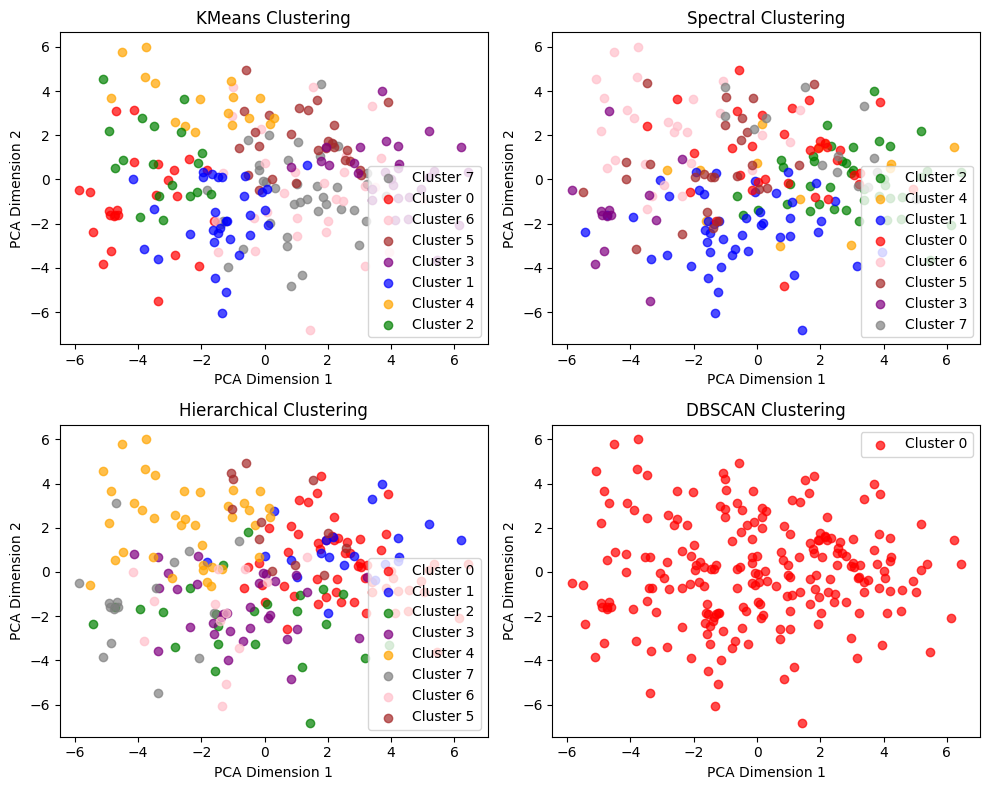


=== Spectral 상세 분석 ===

--- Cluster 0 상세 정보 ---
데이터 수: 33개
주요 카페: TWG Tea 성수낙낙점, 브루크 성수점, 킨보이서울
샘플 리뷰:
  1. 모든 소품들이 twg 로고가 박혀있어 
 고급스러워서 대접 받는 느낌에 더 
 맛나게 기분좋게 먹었습니다 타임리스 홍차도 
 넘~향기롭고 맛났어요. 리조또가 느끼할 쯤 
 한입 마시면 다시 리프레시 되는 
 느낌~ 어버이날이라 딸덕분에 왔는데 모든 
 게 만족스러웠어요. 디저트로 마카롱도 먹었는데 
 지금까지 먹은 마카롱은 아무것도 아니구나 
 하는 맛이었어요 눈 내리는 수요일. 
 특별한 장소에서의 만남을 위한 예약한 
 장소입니다. 지하 B3 주차장에 주차 
 후 엘리베이터를 이용하여 1층에 내려 
 밖으로 나오면 정면에 위치한 이곳은 
 지상에 1층에 위치한 장소 입니다. 
 샐러드는 문어가 들어간것을 주문 했는데요 
 레몬을 짜서 골고루 버무려 먹으니 
 상큼하니 시원한 맛입니다. 안심 스테이크는 
 고기의 육즙이 살아 있으면서 부드럽고 
 불향이 풍미를 더 합니다. 치즈관자 
 리조또는 치즈의 고소함이 깊은 맛을 
 느낄 수 있으며 관자와 함께 
 먹으니 더 푸른색빛은 시금치라고 하네요 
 봉골레 스파게티는 야들야들한 가리비 맛이 
 특이했어요 제가 선택한 티는 매직 
 모던트 티로 코코넛오일 향이 은은하게 
 풍기면서 진한 차 맛을 느낄 
 수 있는 맛으로 아름답게 즐길 
 수 있는 차예요 코스요리 음식이 
 모두 훌륭해요~ 인테리어도 멋지고 직원분들도 
 항상 친절하세요^^ 디저트 세트 하나하나 
 맛있었고 고급진 느낌이었어요. 플레이팅이 예쁘고 
 가게 내부 인테리어 또한 예뻐서 
 분위기 내는데에는 최고의 장소 같네요. 
 다음에는 식사를 해보고 싶어져요 재방문 
 의사 ♂ 홍차 살때가 되었는데 
 마침 근처 볼일이있어서 겸사겸사 점심예약후 
 방문 티가 메인인 곳이라 식사는 
 기대안했는데 분위기도 생각보다 더 클래식하고 
 음식도 맛있었습니다 직원분

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['임베딩']])

print(f"데이터 수: {len(df)}")
print(f"임베딩 차원: {embeddings.shape[1]}")

# 클러스터링 수행
print("1. K-Means Clustering 수행 중...")
kmeans = KMeans(n_clusters=8, random_state=42)
df['KMeans'] = kmeans.fit_predict(embeddings)

print("2. Spectral Clustering 수행 중...")
similarity_matrix = cosine_similarity(embeddings)
spectral = SpectralClustering(n_clusters=8, affinity='precomputed', random_state=42)
df['Spectral'] = spectral.fit_predict(similarity_matrix)

print("3. Hierarchical Clustering 수행 중...")
hierarchical = AgglomerativeClustering(n_clusters=8, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

print("4. DBSCAN 수행 중...")
dbscan = DBSCAN(eps=1, min_samples=5, metric='cosine')
df['DBSCAN'] = dbscan.fit_predict(embeddings)

print("\n=== 클러스터별 주요 키워드 분석 ===")

# TF-IDF 벡터화
stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ', '가게', '카페', '곳']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터링 방법들 (기존 + 새로 추가된 것들)
clustering_methods = ['KMeans', 'Spectral', 'Hierarchical', 'DBSCAN', 'DBSCAN_Auto', 'MeanShift', 'AffinityProp']

# 실제 존재하는 컬럼만 선택
existing_methods = [method for method in clustering_methods if method in df.columns]

for method in existing_methods:
    print(f"\n--- {method} 클러스터별 특성 키워드 ---")
    
    unique_clusters = df[method].unique()
    # -1 (노이즈)가 있으면 제외하고 정렬
    valid_clusters = sorted([c for c in unique_clusters if c != -1])
    if -1 in unique_clusters:
        valid_clusters.append(-1)
    
    for cluster in valid_clusters:
        if cluster == -1:
            noise_count = len(df[df[method] == cluster])
            print(f"Cluster {cluster}: [노이즈 데이터 {noise_count}개]")
            continue
            
        cluster_indices = df[df[method] == cluster].index
        
        if len(cluster_indices) == 0:
            continue
            
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        cluster_size = len(cluster_indices)
        print(f"Cluster {cluster} ({cluster_size}개): {', '.join(top_keywords)}")

# 결과 저장
output_file = "Rdata_clustered_all.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n결과가 '{output_file}'에 저장되었습니다.")

print("\n=== 클러스터링 결과 요약 ===")

for method in existing_methods:
    print(f"\n{method} 클러스터 분포:")
    print(df[method].value_counts().sort_index())

# PCA로 차원 축소 (시각화용)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화 - 존재하는 방법들만
if existing_methods:
    n_methods = len(existing_methods)
    
    # 2x2 또는 적절한 크기로 조정
    if n_methods <= 4:
        rows, cols = 2, 2
    elif n_methods <= 6:
        rows, cols = 2, 3
    else:
        rows, cols = 3, 3
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    if n_methods == 1:
        axes = [axes]
    else:
        axes = axes.ravel()
    
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    
    for i, method in enumerate(existing_methods):
        if i >= len(axes):
            break
            
        ax = axes[i]
        unique_clusters = df[method].unique()
        
        for cluster in unique_clusters:
            cluster_points = reduced_embeddings[df[method] == cluster]
            if cluster == -1: 
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c='black', marker='x', s=50, label='Noise')
            else:
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=colors[cluster % len(colors)], label=f'Cluster {cluster}', alpha=0.7)
        
        ax.set_title(f'{method} Clustering')
        ax.set_xlabel('PCA Dimension 1')
        ax.set_ylabel('PCA Dimension 2')
        ax.legend()
    
    # 빈 subplot 숨기기
    for i in range(n_methods, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 상세 분석 - 가장 좋은 결과를 보이는 방법 선택
best_method = 'Spectral' if 'Spectral' in existing_methods else existing_methods[0]

print(f"\n=== {best_method} 상세 분석 ===")
for cluster in sorted(df[best_method].unique()):
    print(f"\n--- Cluster {cluster} 상세 정보 ---")
    cluster_data = df[df[best_method] == cluster]
    
    print(f"데이터 수: {len(cluster_data)}개")
    
    # 카페이름 컬럼 사용
    if len(cluster_data) > 0:
        top_cafes = cluster_data['카페이름'].value_counts().head(3)
        print(f"주요 카페: {', '.join(top_cafes.index.tolist())}")
        
        print("샘플 리뷰:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

print(f"\n=== 전체 컬럼 정보 ===")
print(f"컬럼명: {df.columns.tolist()}")
print(f"데이터프레임 크기: {df.shape}")

----------------

수직형 클러스터링만

맥 한글 폰트 설정 완료!
데이터 수: 215
임베딩 차원: 768

=== Hierarchical Clustering (n_clusters=7) 수행 ===
실루엣 점수: 0.034

=== 클러스터별 특성 키워드 분석 ===

🔍 클러스터 0 상세 분석
📊 데이터 수: 56개
🔑 주요 키워드: 커피, 가성비, 자주, 커피도, 아이스크림, 친절해요, 맛있게, 있어서, 항상, 커피가

🏪 포함된 카페 목록 (총 56개 카페):
    1. TAKEN COFFEE 건대후문점카페,디저트: 1개 리뷰
    2. 고망고 건대점: 1개 리뷰
    3. 빙동댕 프리미엄 빙수카페 건대점빙수: 1개 리뷰
    4. 빽다방 건대로데오점테이크아웃커피: 1개 리뷰
    5. 빽다방 자양전통시장점테이크아웃커피: 1개 리뷰
    6. 설빙 세종대점: 1개 리뷰
    7. 슈브제: 1개 리뷰
    8. 스칼라또아이스크림: 1개 리뷰
    9. 스타벅스 건대스타시티점: 1개 리뷰
   10. 스타벅스 건대후문점: 1개 리뷰
   11. 스타벅스 자양이마트점: 1개 리뷰
   12. 스택베이커리베이커리: 1개 리뷰
   13. 쑥띵: 1개 리뷰
   14. 아레밀 건대점차: 1개 리뷰
   15. 앤티앤스 롯데백화점 건대스타시티점베이커리: 1개 리뷰
   16. 열매제과점베이커리: 1개 리뷰
   17. 오에이오 서울베이커리: 1개 리뷰
   18. 원플레이 건대점: 1개 리뷰
   19. 위클리베이글 어린이대공원역점베이글: 1개 리뷰
   20. 은비스브레드 건국대점베이커리: 1개 리뷰
   21. 청주명문도너츠베이커리: 1개 리뷰
   22. 최가커피회관카페,디저트: 1개 리뷰
   23. 츄로' S Coffee&lce cream: 1개 리뷰
   24. 카페 언필드: 1개 리뷰
   25. 카페704호카페,디저트: 1개 리뷰
   26. 카페롬곡카페: 1개 리뷰
   27. 커피나무 건대입구역점카페: 1개 리뷰
   28. 브레댄코 건대입구역점베이커리: 1개 리뷰
  

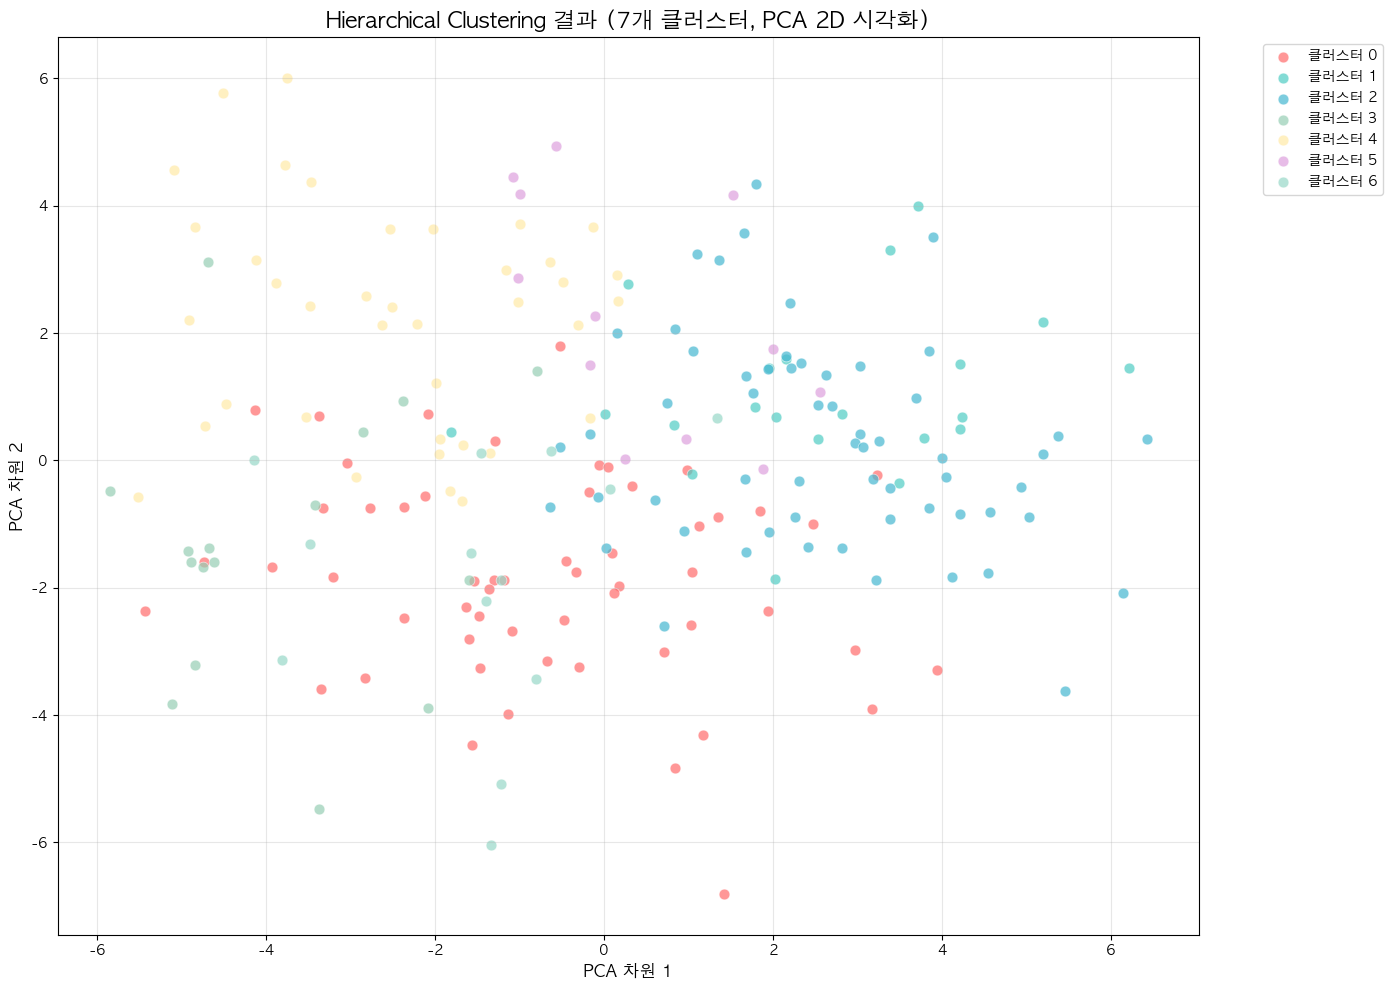


📊 클러스터별 통계 요약
      고유_카페_수  전체_리뷰_수  카페당_평균_리뷰
클러스터                             
0          56       56        1.0
1          21       21        1.0
2          59       59        1.0
3          16       16        1.0
4          38       38        1.0
5          12       12        1.0
6          13       13        1.0

🔍 클러스터별 키워드 요약
클러스터 0 (56개): 커피, 가성비, 자주, 커피도, 아이스크림
클러스터 1 (21개): 커피, 넓고, 있어서, 커피도, 좋은
클러스터 2 (59개): 커피, 커피도, 분위기도, 분위기, 넓고
클러스터 3 (16개): 케이크, 케이크가, 케이크도, 레터링, 예쁘게
클러스터 4 (38개): 밀크티, 맛있게, 맛있었어요, 에그타르트, 맛있어서
클러스터 5 (12개): 커피, 가성비, 스타벅스, 넓고, 매장이
클러스터 6 (13개): 빵이, 베트남, 샌드위치, 샐러드, 빵도

💾 결과가 'Hierarchical_7클러스터_결과.csv'에 저장되었습니다.

🎯 최종 성능:
   - 실루엣 점수: 0.034
   - 클러스터 수: 7
   - 총 데이터 수: 215
   - 총 카페 수: 215


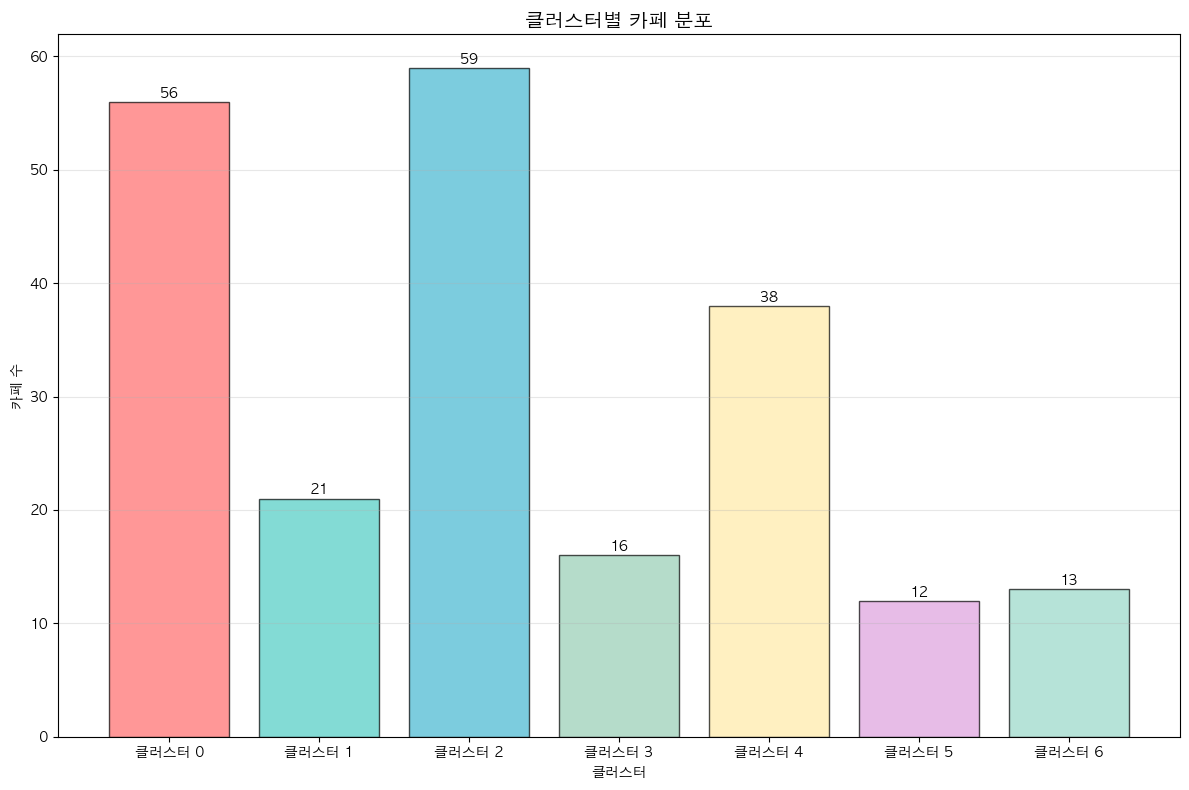

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 맥 한글 폰트 설정
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    """맥에서 한글 폰트 설정"""
    if platform.system() == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
        plt.rcParams['axes.unicode_minus'] = False
        print("맥 한글 폰트 설정 완료!")
    else:
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 적용
set_korean_font()

# 데이터 로드
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['임베딩']])

print(f"데이터 수: {len(df)}")
print(f"임베딩 차원: {embeddings.shape[1]}")

# 클러스터 수를 7개로 고정
n_clusters = 7
print(f"\n=== Hierarchical Clustering (n_clusters={n_clusters}) 수행 ===")

# Hierarchical Clustering 수행
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['클러스터'] = hierarchical.fit_predict(embeddings)

# 실루엣 점수 계산
silhouette_avg = silhouette_score(embeddings, df['클러스터'])
print(f"실루엣 점수: {silhouette_avg:.3f}")

# TF-IDF 벡터화로 키워드 분석
print("\n=== 클러스터별 특성 키워드 분석 ===")
stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ', '가게', '카페', '곳', '여기', '이곳']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 상세 분석
for cluster in sorted(df['클러스터'].unique()):
    print(f"\n{'='*50}")
    print(f"🔍 클러스터 {cluster} 상세 분석")
    print(f"{'='*50}")
    
    cluster_data = df[df['클러스터'] == cluster]
    cluster_indices = cluster_data.index
    
    print(f"📊 데이터 수: {len(cluster_data)}개")
    
    # 특성 키워드 추출
    if len(cluster_indices) > 0:
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:10]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        print(f"🔑 주요 키워드: {', '.join(top_keywords)}")
    
    # 클러스터에 포함된 카페들
    cafe_counts = cluster_data['카페이름'].value_counts()
    print(f"\n🏪 포함된 카페 목록 (총 {len(cafe_counts)}개 카페):")
    for i, (cafe, count) in enumerate(cafe_counts.items()):
        print(f"   {i+1:2d}. {cafe}: {count}개 리뷰")
    
    # 대표 리뷰 3개
    print(f"\n📝 대표 리뷰:")
    sample_reviews = cluster_data['filtered_review'].head(3)
    for i, review in enumerate(sample_reviews):
        print(f"   {i+1}. {review[:100]}..." if len(review) > 100 else f"   {i+1}. {review}")

# 클러스터링 결과 요약
print(f"\n{'='*60}")
print("📈 Hierarchical Clustering 결과 요약")
print(f"{'='*60}")
cluster_summary = df['클러스터'].value_counts().sort_index()
for cluster, count in cluster_summary.items():
    percentage = (count / len(df)) * 100
    print(f"클러스터 {cluster}: {count:3d}개 ({percentage:5.1f}%)")

# PCA로 차원 축소 및 시각화
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

unique_clusters = df['클러스터'].unique()
for i, cluster in enumerate(sorted(unique_clusters)):
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i % len(colors)], label=f'클러스터 {cluster}', 
               alpha=0.7, s=60, edgecolors='white', linewidth=0.5)

plt.title('Hierarchical Clustering 결과 (7개 클러스터, PCA 2D 시각화)', fontsize=16, fontweight='bold')
plt.xlabel('PCA 차원 1', fontsize=12)
plt.ylabel('PCA 차원 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 클러스터별 통계 요약
print(f"\n{'='*60}")
print("📊 클러스터별 통계 요약")
print(f"{'='*60}")

cluster_stats = df.groupby('클러스터').agg({
    '카페이름': ['nunique', 'count'],
    'filtered_review': 'count'
}).round(2)

cluster_stats.columns = ['고유_카페_수', '전체_리뷰_수', '리뷰_수_확인']
cluster_stats = cluster_stats.drop('리뷰_수_확인', axis=1)
cluster_stats['카페당_평균_리뷰'] = (cluster_stats['전체_리뷰_수'] / cluster_stats['고유_카페_수']).round(1)

print(cluster_stats)

# 클러스터별 키워드 요약표
print(f"\n{'='*60}")
print("🔍 클러스터별 키워드 요약")
print(f"{'='*60}")

for cluster in sorted(df['클러스터'].unique()):
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_size = len(cluster_indices)
    
    if len(cluster_indices) > 0:
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:5]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        print(f"클러스터 {cluster} ({cluster_size}개): {', '.join(top_keywords)}")

# 결과 저장
output_file = "Hierarchical_7클러스터_결과.csv"
df_result = df[['카페이름', 'filtered_review', '클러스터']].copy()
df_result.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n💾 결과가 '{output_file}'에 저장되었습니다.")

# 최종 성능 메트릭
print(f"\n🎯 최종 성능:")
print(f"   - 실루엣 점수: {silhouette_avg:.3f}")
print(f"   - 클러스터 수: {n_clusters}")
print(f"   - 총 데이터 수: {len(df)}")
print(f"   - 총 카페 수: {df['카페이름'].nunique()}")

# 클러스터별 카페 분포 시각화
plt.figure(figsize=(12, 8))
cluster_cafe_counts = df.groupby('클러스터')['카페이름'].nunique()

bars = plt.bar(range(len(cluster_cafe_counts)), cluster_cafe_counts.values, 
               color=colors[:len(cluster_cafe_counts)], alpha=0.7, edgecolor='black')

plt.xlabel('클러스터')
plt.ylabel('카페 수')
plt.title('클러스터별 카페 분포', fontsize=14, fontweight='bold')
plt.xticks(range(len(cluster_cafe_counts)), [f'클러스터 {i}' for i in cluster_cafe_counts.index])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

-----------

수직 클러스터링 평가하기

데이터 수: 215
임베딩 차원: 768

=== 최적 클러스터 수 탐색 ===
클러스터 수 2: 실루엣 점수 0.049
클러스터 수 3: 실루엣 점수 0.049
클러스터 수 4: 실루엣 점수 0.047
클러스터 수 5: 실루엣 점수 0.036
클러스터 수 6: 실루엣 점수 0.036
클러스터 수 7: 실루엣 점수 0.034
클러스터 수 8: 실루엣 점수 0.036
클러스터 수 9: 실루엣 점수 0.028
클러스터 수 10: 실루엣 점수 0.029

최적 클러스터 수: 2


/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 4968

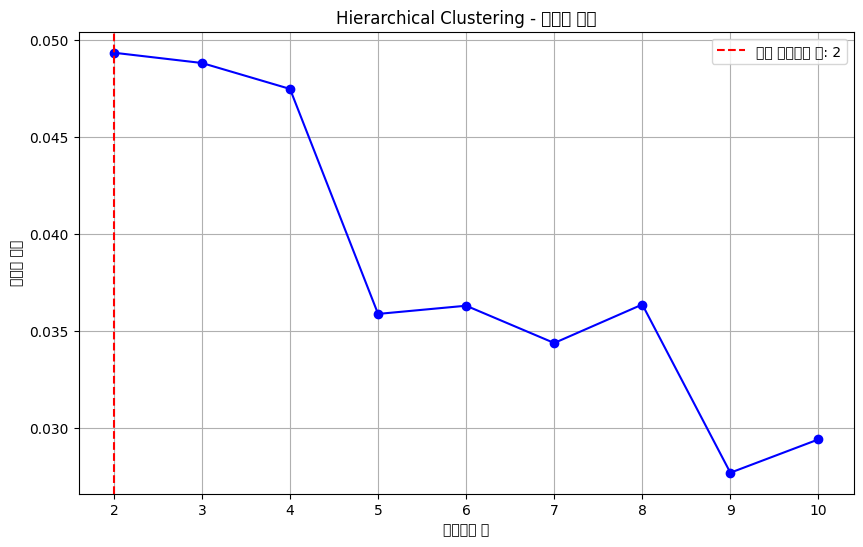


=== Hierarchical Clustering (n_clusters=2) 수행 중... ===

=== 클러스터별 주요 키워드 분석 ===

--- Hierarchical 클러스터별 특성 키워드 ---
Cluster 0 (135개): 케이크, 커피, 빵이, 있어서, 맛있게, 가성비, 자주, 같아요
Cluster 1 (80개): 커피, 커피도, 넓고, 분위기, 분위기도, 좋은, 디저트, 있어서

=== Hierarchical Clustering 결과 요약 ===
Hierarchical
0    135
1     80
Name: count, dtype: int64


/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


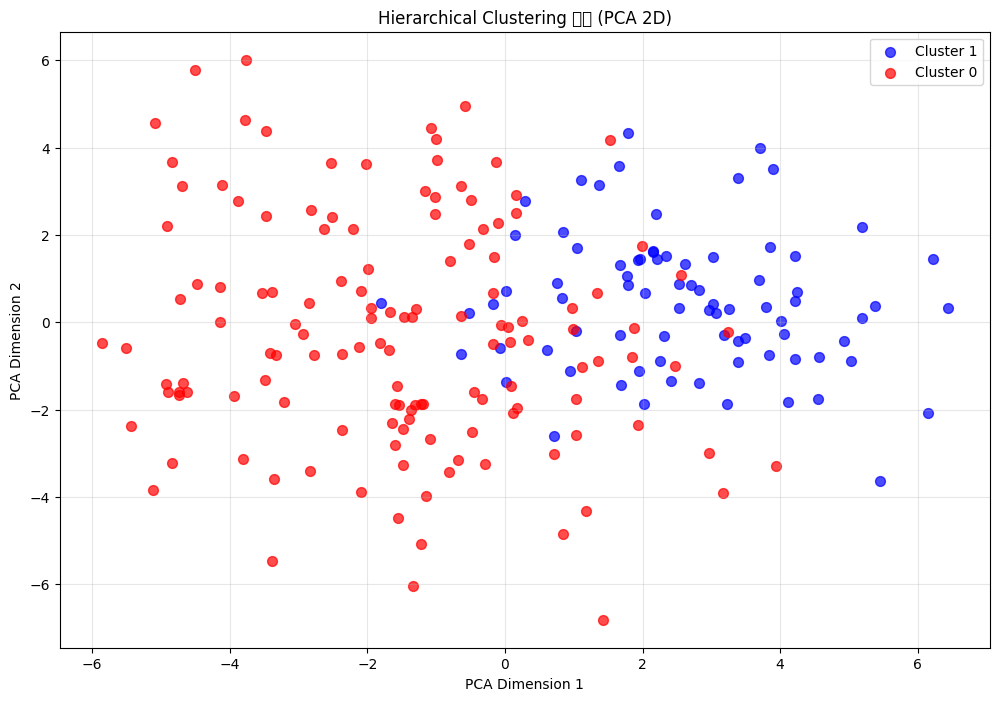


=== Hierarchical Clustering 상세 분석 ===

--- Cluster 0 상세 정보 ---
데이터 수: 135개
주요 카페: TAKEN COFFEE 건대후문점카페,디저트, 아오스요거트, 웨이빙 젤라또
샘플 리뷰:
  1. 저의 최애커피집이에요 점심에 항상 바쁜데도 
 늘 친절해요 음료 메뉴가 엄청 
 많은데 제가 먹어본거는 다 괜찮아요 
 지점이 많이 생기고 있는 것 
 같아서 좋네요 후문 테이큰커피 오랜만에 
 찾아갔어요~ 여전히 아늑한 다락방 분위기ㅎㅎ 
 예전엔 디저트도 있엇는데 이젠 음료만 
 있네요 메뉴 다양하고 가격 여전히 
 착합니다 ㅎ 화장실은 비추고 (외부 
 건물에 있음) 마감도 네이버에 써있는 
 23시 아니고 22시 입니다! 아샷추 
 ~ 오랜만에 마셔봅니다. 여전히 좋네요! 
 잘되셔서 가게 더 내주시면 좋겠다ㅎ저가형 
 카페들보단 맛이 확실히 낫고 자주 
 가기 이번주 내내 갔고 스탬프 
 모으시는 사람들 많이 보여요ㅋㅋ 좋아요:) 
 대학시절 테이큰 한잔 없이는 수업을 
 못 들었었죠...ㅎㅎㅎ 오랜만에 들렀는데 여전히 
 제 스타일... 저희 회사 앞에도 
 내주시면 안돼요 ㅎㅎㅎㅎ제가 제일 애정하는 
 커피집..사랑합니다 테이큰 언제까지나 계속 있어주세요..!! 
 돈까스 점심후 일행들과 건너편 테이큰에서 
 아이스라떼 마셨네요. 이슬비 내리는 조그마한 
 야외 자리에서 운치있게 맛나게 마셨네요~~^^ 
 아주 친절합니다 맛나요 항상가요 커피맛 
 친절해요 쿠폰최도 자주가는곳이에요 커피맛있고 가성비좋고 
 친절해요 물론 다른메뉴들도 강추입니다 자주가서 
 커피농도 알아주시는 센스있는 분들이 있어요 
 건대 후문쪽 커피매장 찾는분이라면 추천드려요 
 조어여 커피 저렴한데 쿠폰도 굿입니다~~~ 
 커피 마시면서 일하기도 대화하기도 좋아요~ 
 공간이 안쪽까지 깊숙이 이어져 있어요~ 
 바깥의 소리 방해 없이 커피 
 마시며 얘기하기 좋습니다! 그리고 음료가 
 매우 다양해서 고르는 재미도 톡톡해요! 
 건대 근

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['임베딩']])

print(f"데이터 수: {len(df)}")
print(f"임베딩 차원: {embeddings.shape[1]}")

# 최적 클러스터 수 찾기 (실루엣 분석)
print("\n=== 최적 클러스터 수 탐색 ===")
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    print(f"클러스터 수 {n_clusters}: 실루엣 점수 {score:.3f}")

# 최적 클러스터 수 선택
optimal_n = cluster_range[np.argmax(silhouette_scores)]
print(f"\n최적 클러스터 수: {optimal_n}")

# 실루엣 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('클러스터 수')
plt.ylabel('실루엣 점수')
plt.title('Hierarchical Clustering - 실루엣 분석')
plt.axvline(x=optimal_n, color='red', linestyle='--', label=f'최적 클러스터 수: {optimal_n}')
plt.legend()
plt.grid(True)
plt.show()

# 최종 Hierarchical Clustering 수행
print(f"\n=== Hierarchical Clustering (n_clusters={optimal_n}) 수행 중... ===")
hierarchical = AgglomerativeClustering(n_clusters=optimal_n, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

# 클러스터별 주요 키워드 분석
print("\n=== 클러스터별 주요 키워드 분석 ===")

# TF-IDF 벡터화
stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ', '가게', '카페', '곳']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

print(f"\n--- Hierarchical 클러스터별 특성 키워드 ---")

for cluster in sorted(df['Hierarchical'].unique()):
    cluster_indices = df[df['Hierarchical'] == cluster].index
    
    if len(cluster_indices) == 0:
        continue
        
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
    top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
    
    cluster_size = len(cluster_indices)
    print(f"Cluster {cluster} ({cluster_size}개): {', '.join(top_keywords)}")

# 클러스터링 결과 요약
print("\n=== Hierarchical Clustering 결과 요약 ===")
print(df['Hierarchical'].value_counts().sort_index())

# PCA로 차원 축소 및 시각화
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

unique_clusters = df['Hierarchical'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['Hierarchical'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster % len(colors)], label=f'Cluster {cluster}', alpha=0.7, s=50)

plt.title('Hierarchical Clustering 결과 (PCA 2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 상세 분석
print(f"\n=== Hierarchical Clustering 상세 분석 ===")
for cluster in sorted(df['Hierarchical'].unique()):
    print(f"\n--- Cluster {cluster} 상세 정보 ---")
    cluster_data = df[df['Hierarchical'] == cluster]
    
    print(f"데이터 수: {len(cluster_data)}개")
    
    # 주요 카페
    if len(cluster_data) > 0:
        top_cafes = cluster_data['카페이름'].value_counts().head(3)
        print(f"주요 카페: {', '.join(top_cafes.index.tolist())}")
        
        # 샘플 리뷰
        print("샘플 리뷰:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

# 결과 저장
output_file = "Rdata_hierarchical_clustered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nHierarchical Clustering 결과가 '{output_file}'에 저장되었습니다.")

# 클러스터별 통계
print(f"\n=== 클러스터별 통계 ===")
cluster_stats = df.groupby('Hierarchical').agg({
    '카페이름': 'nunique',
    'filtered_review': 'count'
}).rename(columns={'카페이름': '카페 수', 'filtered_review': '리뷰 수'})

print(cluster_stats)

--------------

Kmeans 클러스터 평가

폰트 설정 완료: Apple SD Gothic Neo
데이터 수: 215
임베딩 차원: 768

=== K-Means 최적 클러스터 수 탐색 ===
클러스터 수 2: 실루엣 점수 0.067, 관성 14869.86
클러스터 수 3: 실루엣 점수 0.063, 관성 14267.26
클러스터 수 4: 실루엣 점수 0.051, 관성 13782.27
클러스터 수 5: 실루엣 점수 0.040, 관성 13431.03
클러스터 수 6: 실루엣 점수 0.034, 관성 13214.16
클러스터 수 7: 실루엣 점수 0.032, 관성 12995.80
클러스터 수 8: 실루엣 점수 0.033, 관성 12785.29
클러스터 수 9: 실루엣 점수 0.025, 관성 12574.78
클러스터 수 10: 실루엣 점수 0.026, 관성 12401.68

실루엣 점수 기준 최적 클러스터 수: 2


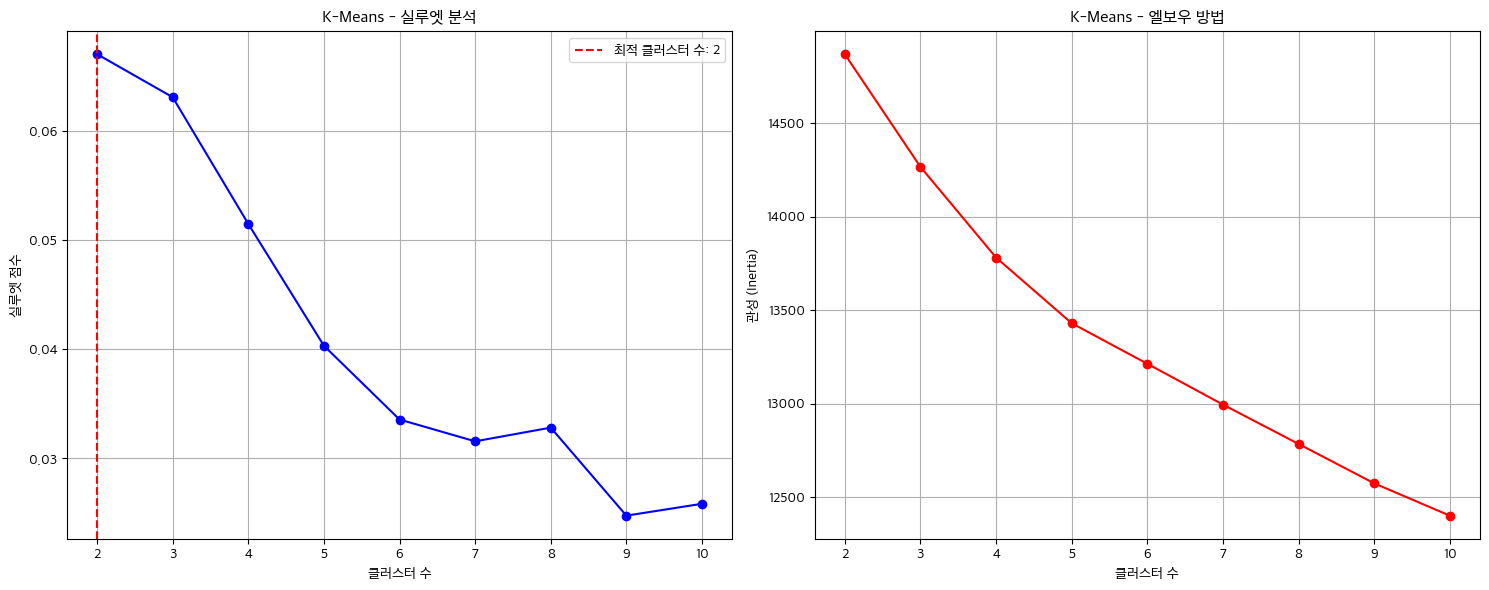

엘보우 방법 기준 최적 클러스터 수: 4

최종 선택된 클러스터 수: 2

=== K-Means Clustering (n_clusters=2) 수행 중... ===

=== 클러스터별 주요 키워드 분석 ===

--- K-Means 클러스터별 특성 키워드 ---
Cluster 0 (96개): 커피, 커피도, 넓고, 분위기, 좋은, 커피가, 분위기도, 있어서
Cluster 1 (119개): 케이크, 빵이, 맛있게, 있어서, 맛있었어요, 자주, 맛있어서, 같아요

=== K-Means Clustering 결과 요약 ===
KMeans
0     96
1    119
Name: count, dtype: int64


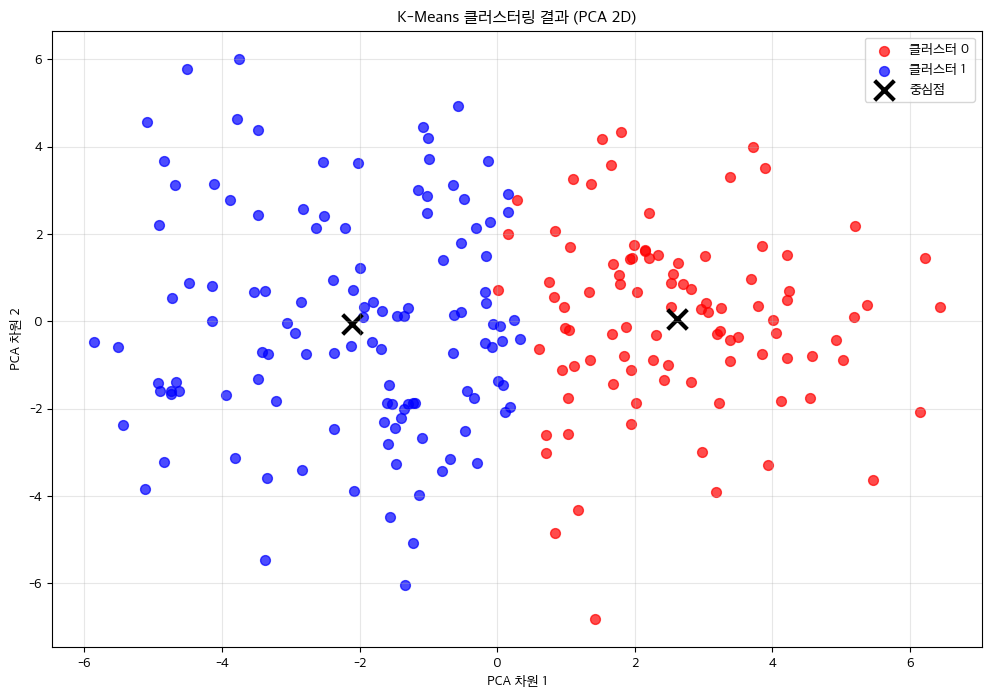


=== K-Means Clustering 상세 분석 ===

--- 클러스터 0 상세 정보 ---
데이터 수: 96개
주요 카페: FFEE, TAKEN COFFEE 건대후문점카페,디저트, 카페드라이카페,디저트
샘플 리뷰:
  1. 아메라카노 원두 세가지 중에 고를 
 수 있어서 취향에 맞게 먹을 
 수 있어 좋아요. 물론 맛도 
 좋구요! 바닐라빈라떼랑 휘낭시에랑 에그타르트도 다 
 맛있어서 허겁지겁 먹었네요ㅋㅋ +담요, 깨끗한 
 화장실, 엉따비데 최고! 카페 안에 
 아늑하고 꽤 넓은 공간이 있어 
 편하게 대화하기 좋았습니다! 휘낭시에도 맛있었고 
 얼그레이티도 진해서 좋았어요 :) 다음번에는 
 피스타치오 라떼 마시러 올게요 ~ 
 항상 지나 다니던 곳인데 이런 
 곳에 카페가 있는지 처음 알았어요. 
 약간 나만의 숨은 공간 느낌 
 커피도 직원 분들도 친절하고 또 
 올 것 같습니다 팝업 웨이팅하러 
 오게 된 카페인데 편히 시간 
 보내기 충전코드도 많고 의자도 편하고 
 화장실 깨끗하고 담요에 물까지 배려가 
 많이 느껴지는 카페예요 선곡도 좋네용 
 가격이 합리적이규 분위기가 인테리어도 넘 
 이쁘고 음료랑 디저트들도 맛나용ㅎㅎ 사장님도 
 친절하세요!! 피자빵 맛의 휘낭시에 기대하며..달달한 
 녹차라떼와의 조화가!!ㅋㅋ 라떼 덜 달게 
 해주셔서 맛있네여!! 포장해서 먹었어용. 피스타치오크림라떼 
 존맛 !!! 초코피칸쿠키도 맛있구 크기 
 짱 커용 지나가면서 겉만 봤을 
 때는 테이크아웃 커피점으로 보였는데, 안으로 
 들어가면 반층 위에 꽤 넓은 
 공간이 있어서 앉아서 대화하면서 먹기에 
 좋습니다. 커피도 디저트도 다 ^^ 
 쏘낭시에 맛있어요^^ 속은 포근하고 겉은 
 바삭하네요^^ 맛난 소시지가 두 개나 
 들어 있어요! 휘낭시에 맛집! 맛있습니다!! 
 최애 ㅡ 피스타치오크림라떼 새로 나온 
 ㅡ 스콘 비오는 날 고소한 
 냄새 솔솔~~~ 분위기 맛있어요^^ 흑흑 
 분위기도 넘 디저트도 맛나요 밖에서 
 봤을때 안보이는 공간

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 맥 한글 폰트 설정
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    """맥에서 한글 폰트 설정"""
    if platform.system() == 'Darwin':  # macOS
        # 맥에서 사용 가능한 한글 폰트들
        font_list = [
            '/System/Library/Fonts/AppleSDGothicNeo.ttc',  # 애플 산돌고딕 네오
            '/Library/Fonts/NanumGothic.ttf',              # 나눔고딕 (설치된 경우)
            '/System/Library/Fonts/Helvetica.ttc'          # 백업용
        ]
        
        for font_path in font_list:
            try:
                font_prop = fm.FontProperties(fname=font_path)
                plt.rcParams['font.family'] = font_prop.get_name()
                print(f"폰트 설정 완료: {font_prop.get_name()}")
                break
            except:
                continue
        
        # 마이너스 기호 깨짐 방지
        plt.rcParams['axes.unicode_minus'] = False
    else:
        # Windows나 Linux의 경우
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 적용
set_korean_font()

# 데이터 로드
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['임베딩']])

print(f"데이터 수: {len(df)}")
print(f"임베딩 차원: {embeddings.shape[1]}")

# 최적 클러스터 수 찾기 (실루엣 분석 + 엘보우 방법)
print("\n=== K-Means 최적 클러스터 수 탐색 ===")
cluster_range = range(2, 11)
silhouette_scores = []
inertias = []  # 엘보우 방법용

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    
    # 실루엣 점수
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    
    # 관성 (엘보우 방법)
    inertias.append(kmeans.inertia_)
    
    print(f"클러스터 수 {n_clusters}: 실루엣 점수 {score:.3f}, 관성 {kmeans.inertia_:.2f}")

# 최적 클러스터 수 선택 (실루엣 점수 기준)
optimal_n_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"\n실루엣 점수 기준 최적 클러스터 수: {optimal_n_silhouette}")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 실루엣 점수 그래프
ax1.plot(cluster_range, silhouette_scores, 'bo-')
ax1.set_xlabel('클러스터 수')
ax1.set_ylabel('실루엣 점수')
ax1.set_title('K-Means - 실루엣 분석')
ax1.axvline(x=optimal_n_silhouette, color='red', linestyle='--', 
           label=f'최적 클러스터 수: {optimal_n_silhouette}')
ax1.legend()
ax1.grid(True)

# 엘보우 방법 그래프
ax2.plot(cluster_range, inertias, 'ro-')
ax2.set_xlabel('클러스터 수')
ax2.set_ylabel('관성 (Inertia)')
ax2.set_title('K-Means - 엘보우 방법')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 엘보우 포인트 찾기 (간단한 방법)
def find_elbow_point(inertias):
    # 기울기 변화가 가장 큰 지점 찾기
    diffs = np.diff(inertias)
    diffs2 = np.diff(diffs)
    elbow_point = np.argmax(diffs2) + 2  # +2는 인덱스 보정
    return elbow_point

optimal_n_elbow = find_elbow_point(inertias)
print(f"엘보우 방법 기준 최적 클러스터 수: {optimal_n_elbow}")

# 최종 선택: 실루엣 점수 우선
final_n_clusters = optimal_n_silhouette
print(f"\n최종 선택된 클러스터 수: {final_n_clusters}")

# 최종 K-Means Clustering 수행
print(f"\n=== K-Means Clustering (n_clusters={final_n_clusters}) 수행 중... ===")
kmeans_final = KMeans(n_clusters=final_n_clusters, random_state=42, n_init=10)
df['KMeans'] = kmeans_final.fit_predict(embeddings)

# 클러스터별 주요 키워드 분석
print("\n=== 클러스터별 주요 키워드 분석 ===")

# TF-IDF 벡터화
stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ', '가게', '카페', '곳']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

print(f"\n--- K-Means 클러스터별 특성 키워드 ---")

for cluster in sorted(df['KMeans'].unique()):
    cluster_indices = df[df['KMeans'] == cluster].index
    
    if len(cluster_indices) == 0:
        continue
        
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
    top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
    
    cluster_size = len(cluster_indices)
    print(f"Cluster {cluster} ({cluster_size}개): {', '.join(top_keywords)}")

# 클러스터링 결과 요약
print("\n=== K-Means Clustering 결과 요약 ===")
print(df['KMeans'].value_counts().sort_index())

# PCA로 차원 축소 및 시각화
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

unique_clusters = df['KMeans'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['KMeans'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster % len(colors)], label=f'클러스터 {cluster}', alpha=0.7, s=50)

# 클러스터 중심점도 표시
cluster_centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
           c='black', marker='x', s=200, linewidths=3, label='중심점')

plt.title('K-Means 클러스터링 결과 (PCA 2D)')
plt.xlabel('PCA 차원 1')
plt.ylabel('PCA 차원 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 상세 분석
print(f"\n=== K-Means Clustering 상세 분석 ===")
for cluster in sorted(df['KMeans'].unique()):
    print(f"\n--- 클러스터 {cluster} 상세 정보 ---")
    cluster_data = df[df['KMeans'] == cluster]
    
    print(f"데이터 수: {len(cluster_data)}개")
    
    # 주요 카페
    if len(cluster_data) > 0:
        top_cafes = cluster_data['카페이름'].value_counts().head(3)
        print(f"주요 카페: {', '.join(top_cafes.index.tolist())}")
        
        # 샘플 리뷰
        print("샘플 리뷰:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

# 클러스터 중심점과의 거리 분석
print(f"\n=== 클러스터 중심점 분석 ===")
for cluster in sorted(df['KMeans'].unique()):
    cluster_indices = df[df['KMeans'] == cluster].index
    cluster_embeddings = embeddings[cluster_indices]
    center = kmeans_final.cluster_centers_[cluster]
    
    # 중심점과의 거리 계산
    distances = np.linalg.norm(cluster_embeddings - center, axis=1)
    
    print(f"클러스터 {cluster}:")
    print(f"  평균 거리: {np.mean(distances):.3f}")
    print(f"  표준편차: {np.std(distances):.3f}")
    print(f"  최대 거리: {np.max(distances):.3f}")

# 결과 저장
output_file = "Rdata_kmeans_clustered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nK-Means Clustering 결과가 '{output_file}'에 저장되었습니다.")

# 클러스터별 통계
print(f"\n=== 클러스터별 통계 ===")
cluster_stats = df.groupby('KMeans').agg({
    '카페이름': 'nunique',
    'filtered_review': 'count'
}).rename(columns={'카페이름': '카페 수', 'filtered_review': '리뷰 수'})

print(cluster_stats)

# 성능 메트릭 요약
print(f"\n=== 최종 성능 메트릭 ===")
final_silhouette = silhouette_score(embeddings, df['KMeans'])
print(f"최종 실루엣 점수: {final_silhouette:.3f}")
print(f"최종 관성: {kmeans_final.inertia_:.2f}")
print(f"클러스터 수: {final_n_clusters}")